In [ ]:
# needed
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import mpld3
# data class
from dataset import dataset
%matplotlib inline

mpld3.enable_notebook()


# Loading the data files
* declare dataset object
* use object to load training set
* visualize head of training set 

In [ ]:
ds = dataset()
ds.build_train_set()


# Linear Model

## Split features and targets

In [ ]:
TD = ds.training_data.sample(frac=1)
y = TD.d_temp
X = TD.drop('d_temp', axis=1)

In [ ]:
#poly = PolynomialFeatures(2)
#Xs = poly.fit_transform(X)
scaler = MinMaxScaler()
Xs = scaler.fit_transform(X)


## Validation split

In [ ]:
#LM = linear_model.LinearRegression(fit_intercept=False)
LM = linear_model.Ridge(alpha=7, fit_intercept=False)
#LM = SVR(kernel='poly')
LM.fit(Xs, y)
#LM.coef_

parameters = {
              'alpha': [.000001, .00001, .0001, .001,.005,.01,.05, 1, 5, 10, 50],
              }
LMg = linear_model.Ridge(fit_intercept=False)
LM = GridSearchCV(LMg, parameters, scoring='neg_mean_squared_error', cv=20)
LM.fit(Xs,y)

LM.best_estimator_

In [ ]:
#pd.DataFrame(LM.cv_results_)

# predictor

In [ ]:
def predictor(X):
    #Xs = poly.transform(X)
    Xs = scaler.transform(X)
    return LM.predict(Xs)


In [ ]:
df,t,p,x = ds.trace_test(predictor)
plt.figure(figsize=(8,6))
plt.plot(x,t,'ro-')
plt.plot(x,p[:-1],'g.-')
plt.show()
d = pd.DataFrame(scaler.transform(df), columns=df.columns)
plt.figure(figsize=(20,5))

for event in d.columns:
    if event == 'temp':
        continue
    plt.step(x,d[event])
    plt.title(event)
plt.show()


In [ ]:
plt.figure(figsize=(20,5))
for event in df.columns:
    if event != 'PERF_COUNT_HW_CACHE_MISSES' and event != 'PERF_COUNT_HW_CACHE_LL_read_miss':
        continue
    plt.step(x,df[event])
    plt.title(event)
plt.show()

In [ ]:
#fs = zip(LM.best_estimator_.coef_, df.columns)
fs = zip(LM.coef_, df.columns)
[print(x) for x in fs];


In [ ]:
d = pd.DataFrame(scaler.transform(df), columns=df.columns)
#d = df

for event in d.columns:
    if event == 'temp':
        continue
    plt.figure(figsize=(20,2))
    plt.step(x,d[event])
    plt.title(event)
    plt.show()

In [ ]:
for i in df:print(i)

In [49]:
y = ds.training_data.d_temp.to_numpy()
X = ds.training_data.drop('d_temp',axis=1)

sv = MinMaxScaler()
Xv = sv.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xv,y,test_size = .3)

In [50]:
Lv = linear_model.Ridge(alpha=1, fit_intercept = False)
Lv.fit(X_train, y_train)
x = zip(X.columns,Lv.coef_)
#for i in x: print(i)
param_dict = {}
for i in x: param_dict[i[0]] = i[1]
    
def v_predict(X):
    Xs = sv.transform(X)
    return Lv.predict(Xs)

pd.DataFrame({'parameter value':Lv.coef_}, index=X.columns)

,parameter value
temp,-0.238986
delta_t,0.000000
PERF_COUNT_HW_CPU_CYCLES,0.076222
PERF_COUNT_HW_INSTRUCTIONS,0.052034
PERF_COUNT_HW_CACHE_MISSES,0.174529
PERF_COUNT_HW_BRANCH_MISSES,0.748549
PERF_COUNT_HW_BRANCH_INSTRUCTIONS,0.059867
PERF_COUNT_HW_CACHE_LL_read_miss,-0.024886
PERF_COUNT_HW_CACHE_L1D_read_miss,0.175120


In [51]:
y_hat = Lv.predict(X_test)

temp: [54.768 56.382 56.92  59.072 58.534 59.072 59.61  59.072]
t0  : [54.768 56.382 56.92  59.072 58.534 59.072 59.61  59.072]
t1  : [56.382 56.92  59.072 58.534 59.072 59.61  59.072 59.61 ]
dt  : [ 1.614  0.538  2.152 -0.538  0.538  0.538 -0.538  0.538]
     temp   delta_t  PERF_COUNT_HW_CPU_CYCLES  PERF_COUNT_HW_INSTRUCTIONS  \
0  54.768  1.001669                 465141381                   395703450   

   PERF_COUNT_HW_CACHE_MISSES  PERF_COUNT_HW_BRANCH_MISSES  \
0                       28462                      5431013   

   PERF_COUNT_HW_BRANCH_INSTRUCTIONS  PERF_COUNT_HW_CACHE_LL_read_miss  \
0                           46762439                             27928   

   PERF_COUNT_HW_CACHE_L1D_read_miss  
0                              28462  


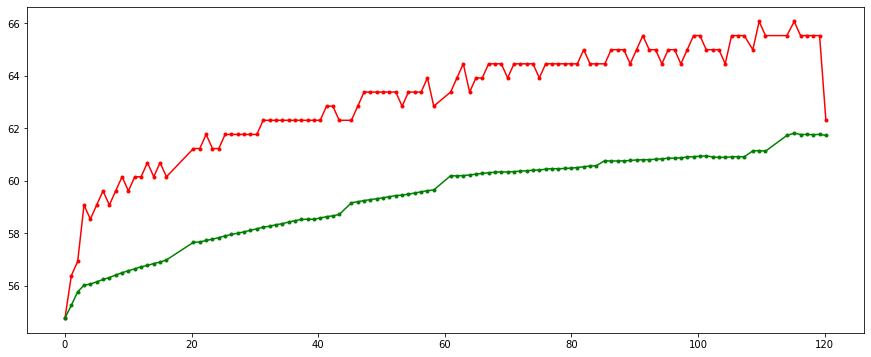

temp: [55.306 56.92  56.92  57.996 59.072 59.072 59.61  59.61 ]
t0  : [55.306 56.92  56.92  57.996 59.072 59.072 59.61  59.61 ]
t1  : [56.92  56.92  57.996 59.072 59.072 59.61  59.61  60.148]
dt  : [1.614 0.    1.076 1.076 0.    0.538 0.    0.538]
     temp   delta_t  PERF_COUNT_HW_CPU_CYCLES  PERF_COUNT_HW_INSTRUCTIONS  \
0  55.306  1.002705                 717752635                   628325289   

   PERF_COUNT_HW_CACHE_MISSES  PERF_COUNT_HW_BRANCH_MISSES  \
0                       33275                     12283093   

   PERF_COUNT_HW_BRANCH_INSTRUCTIONS  PERF_COUNT_HW_CACHE_LL_read_miss  \
0                           72466565                             31867   

   PERF_COUNT_HW_CACHE_L1D_read_miss  
0                              33276  


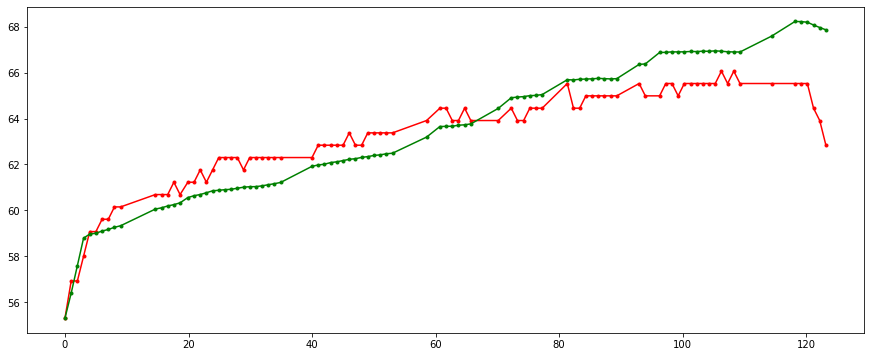

temp: [54.768 56.92  57.458 57.458 58.534 59.61  59.072 59.61 ]
t0  : [54.768 56.92  57.458 57.458 58.534 59.61  59.072 59.61 ]
t1  : [56.92  57.458 57.458 58.534 59.61  59.072 59.61  60.148]
dt  : [ 2.152  0.538  0.     1.076  1.076 -0.538  0.538  0.538]
     temp   delta_t  PERF_COUNT_HW_CPU_CYCLES  PERF_COUNT_HW_INSTRUCTIONS  \
0  54.768  1.007874                 632100525                   551582374   

   PERF_COUNT_HW_CACHE_MISSES  PERF_COUNT_HW_BRANCH_MISSES  \
0                       42307                     10920333   

   PERF_COUNT_HW_BRANCH_INSTRUCTIONS  PERF_COUNT_HW_CACHE_LL_read_miss  \
0                           63565571                             40121   

   PERF_COUNT_HW_CACHE_L1D_read_miss  
0                              42309  


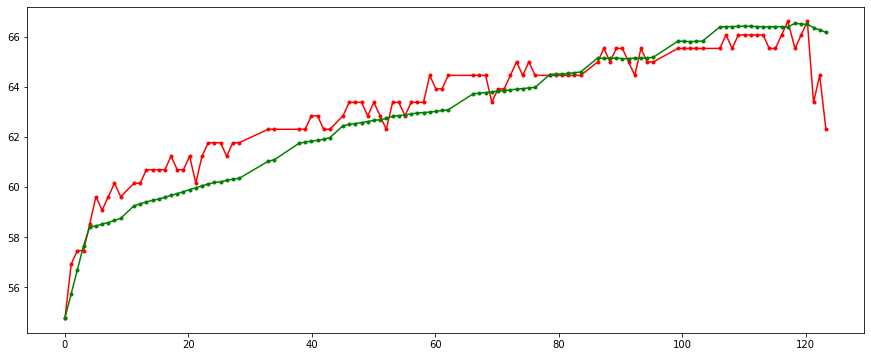

temp: [54.768 56.92  56.92  57.996 57.996 58.534 59.072 59.61 ]
t0  : [54.768 56.92  56.92  57.996 57.996 58.534 59.072 59.61 ]
t1  : [56.92  56.92  57.996 57.996 58.534 59.072 59.61  59.072]
dt  : [ 2.152  0.     1.076  0.     0.538  0.538  0.538 -0.538]
     temp  delta_t  PERF_COUNT_HW_CPU_CYCLES  PERF_COUNT_HW_INSTRUCTIONS  \
0  54.768  1.00905                 505192428                   420832949   

   PERF_COUNT_HW_CACHE_MISSES  PERF_COUNT_HW_BRANCH_MISSES  \
0                       48847                      4368233   

   PERF_COUNT_HW_BRANCH_INSTRUCTIONS  PERF_COUNT_HW_CACHE_LL_read_miss  \
0                           50405220                             46952   

   PERF_COUNT_HW_CACHE_L1D_read_miss  
0                              48849  


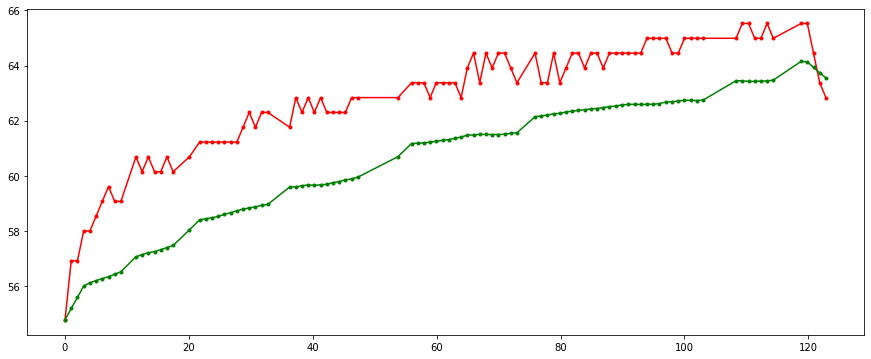

temp: [55.844 56.92  57.996 59.072 59.072 60.148 59.61  60.148]
t0  : [55.844 56.92  57.996 59.072 59.072 60.148 59.61  60.148]
t1  : [56.92  57.996 59.072 59.072 60.148 59.61  60.148 60.148]
dt  : [ 1.076  1.076  1.076  0.     1.076 -0.538  0.538  0.   ]
     temp   delta_t  PERF_COUNT_HW_CPU_CYCLES  PERF_COUNT_HW_INSTRUCTIONS  \
0  55.844  1.002149                 481739186                   442024134   

   PERF_COUNT_HW_CACHE_MISSES  PERF_COUNT_HW_BRANCH_MISSES  \
0                       88735                     15873479   

   PERF_COUNT_HW_BRANCH_INSTRUCTIONS  PERF_COUNT_HW_CACHE_LL_read_miss  \
0                           47591439                             82190   

   PERF_COUNT_HW_CACHE_L1D_read_miss  
0                              88736  


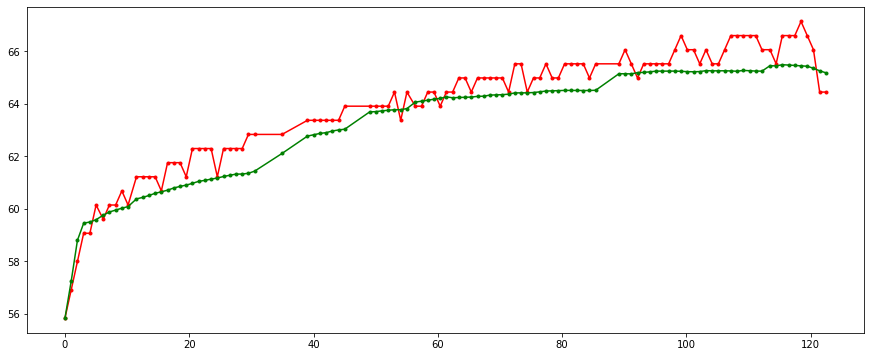

temp: [54.768 56.382 56.92  57.996 58.534 59.61  59.61  60.148]
t0  : [54.768 56.382 56.92  57.996 58.534 59.61  59.61  60.148]
t1  : [56.382 56.92  57.996 58.534 59.61  59.61  60.148 60.148]
dt  : [1.614 0.538 1.076 0.538 1.076 0.    0.538 0.   ]
     temp   delta_t  PERF_COUNT_HW_CPU_CYCLES  PERF_COUNT_HW_INSTRUCTIONS  \
0  54.768  1.001771                 550493846                   481434231   

   PERF_COUNT_HW_CACHE_MISSES  PERF_COUNT_HW_BRANCH_MISSES  \
0                       30025                      9481807   

   PERF_COUNT_HW_BRANCH_INSTRUCTIONS  PERF_COUNT_HW_CACHE_LL_read_miss  \
0                           55510214                             29196   

   PERF_COUNT_HW_CACHE_L1D_read_miss  
0                              30026  


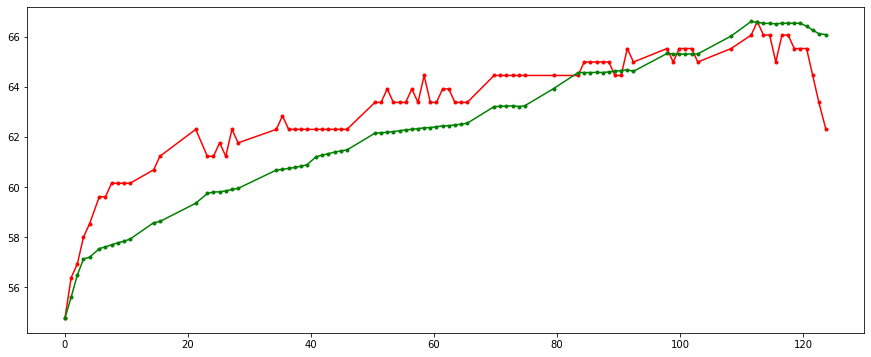

temp: [54.768 55.844 56.92  57.458 57.996 57.996 58.534 57.996]
t0  : [54.768 55.844 56.92  57.458 57.996 57.996 58.534 57.996]
t1  : [55.844 56.92  57.458 57.996 57.996 58.534 57.996 57.996]
dt  : [ 1.076  1.076  0.538  0.538  0.     0.538 -0.538  0.   ]
     temp   delta_t  PERF_COUNT_HW_CPU_CYCLES  PERF_COUNT_HW_INSTRUCTIONS  \
0  54.768  1.004302                 556223856                   446260969   

   PERF_COUNT_HW_CACHE_MISSES  PERF_COUNT_HW_BRANCH_MISSES  \
0                       43862                       297509   

   PERF_COUNT_HW_BRANCH_INSTRUCTIONS  PERF_COUNT_HW_CACHE_LL_read_miss  \
0                           55497256                             42568   

   PERF_COUNT_HW_CACHE_L1D_read_miss  
0                              43864  


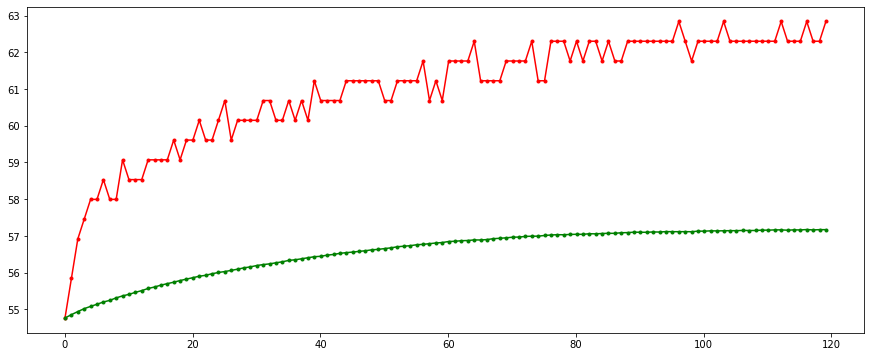

temp: [55.306 56.92  57.458 58.534 59.61  59.072 59.61  59.61 ]
t0  : [55.306 56.92  57.458 58.534 59.61  59.072 59.61  59.61 ]
t1  : [56.92  57.458 58.534 59.61  59.072 59.61  59.61  59.61 ]
dt  : [ 1.614  0.538  1.076  1.076 -0.538  0.538  0.     0.   ]
     temp   delta_t  PERF_COUNT_HW_CPU_CYCLES  PERF_COUNT_HW_INSTRUCTIONS  \
0  55.306  1.003143                 740081775                   620802342   

   PERF_COUNT_HW_CACHE_MISSES  PERF_COUNT_HW_BRANCH_MISSES  \
0                       50121                      6750111   

   PERF_COUNT_HW_BRANCH_INSTRUCTIONS  PERF_COUNT_HW_CACHE_LL_read_miss  \
0                           74166959                             47294   

   PERF_COUNT_HW_CACHE_L1D_read_miss  
0                              50122  


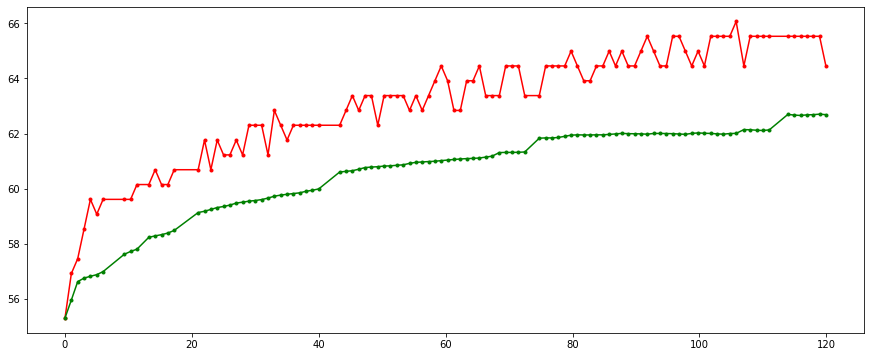

temp: [54.768 56.92  56.92  56.92  57.996 57.996 57.996 57.996]
t0  : [54.768 56.92  56.92  56.92  57.996 57.996 57.996 57.996]
t1  : [56.92  56.92  56.92  57.996 57.996 57.996 57.996 57.996]
dt  : [2.152 0.    0.    1.076 0.    0.    0.    0.   ]
     temp   delta_t  PERF_COUNT_HW_CPU_CYCLES  PERF_COUNT_HW_INSTRUCTIONS  \
0  54.768  1.003513                 283325008                   223620317   

   PERF_COUNT_HW_CACHE_MISSES  PERF_COUNT_HW_BRANCH_MISSES  \
0                       45877                       191619   

   PERF_COUNT_HW_BRANCH_INSTRUCTIONS  PERF_COUNT_HW_CACHE_LL_read_miss  \
0                           27844245                             44811   

   PERF_COUNT_HW_CACHE_L1D_read_miss  
0                              45880  


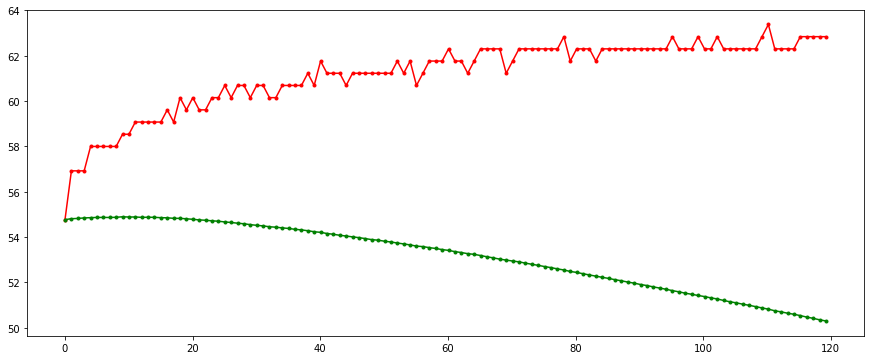

temp: [53.692 54.768 55.844 56.92  57.996 57.996 57.996 57.996]
t0  : [53.692 54.768 55.844 56.92  57.996 57.996 57.996 57.996]
t1  : [54.768 55.844 56.92  57.996 57.996 57.996 57.996 58.534]
dt  : [1.076 1.076 1.076 1.076 0.    0.    0.    0.538]
     temp   delta_t  PERF_COUNT_HW_CPU_CYCLES  PERF_COUNT_HW_INSTRUCTIONS  \
0  53.692  1.001147                 584921165                   544285206   

   PERF_COUNT_HW_CACHE_MISSES  PERF_COUNT_HW_BRANCH_MISSES  \
0                       70620                     19531307   

   PERF_COUNT_HW_BRANCH_INSTRUCTIONS  PERF_COUNT_HW_CACHE_LL_read_miss  \
0                           58564745                             66273   

   PERF_COUNT_HW_CACHE_L1D_read_miss  
0                              70621  


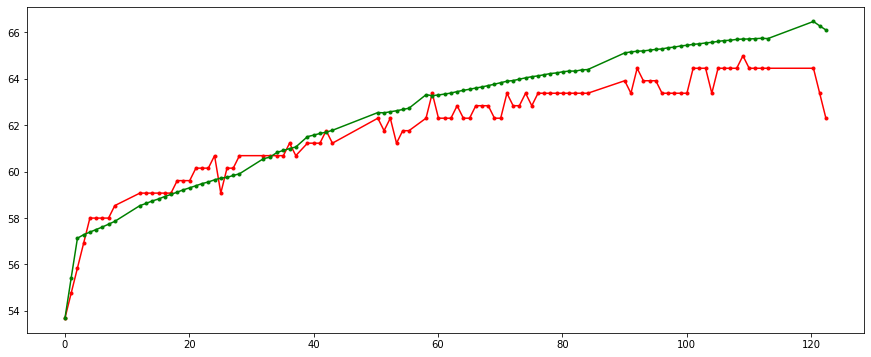

temp: [55.844 56.92  58.534 58.534 59.072 59.072 60.148 60.148]
t0  : [55.844 56.92  58.534 58.534 59.072 59.072 60.148 60.148]
t1  : [56.92  58.534 58.534 59.072 59.072 60.148 60.148 60.148]
dt  : [1.076 1.614 0.    0.538 0.    1.076 0.    0.   ]
     temp   delta_t  PERF_COUNT_HW_CPU_CYCLES  PERF_COUNT_HW_INSTRUCTIONS  \
0  55.844  1.002193                 739076696                   643091924   

   PERF_COUNT_HW_CACHE_MISSES  PERF_COUNT_HW_BRANCH_MISSES  \
0                       59420                     12625258   

   PERF_COUNT_HW_BRANCH_INSTRUCTIONS  PERF_COUNT_HW_CACHE_LL_read_miss  \
0                           74140313                             56356   

   PERF_COUNT_HW_CACHE_L1D_read_miss  
0                              59421  


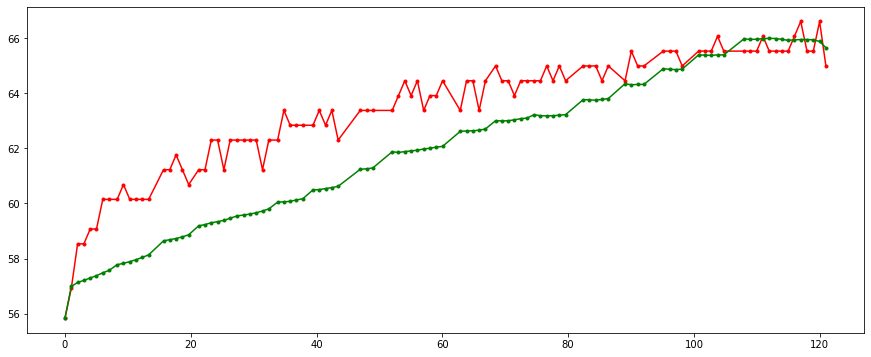

temp: [55.306 56.382 56.92  57.996 59.072 59.61  60.148 60.148]
t0  : [55.306 56.382 56.92  57.996 59.072 59.61  60.148 60.148]
t1  : [56.382 56.92  57.996 59.072 59.61  60.148 60.148 60.148]
dt  : [1.076 0.538 1.076 1.076 0.538 0.538 0.    0.   ]
     temp   delta_t  PERF_COUNT_HW_CPU_CYCLES  PERF_COUNT_HW_INSTRUCTIONS  \
0  55.306  1.004653                 531840760                   472105209   

   PERF_COUNT_HW_CACHE_MISSES  PERF_COUNT_HW_BRANCH_MISSES  \
0                       28490                     10941676   

   PERF_COUNT_HW_BRANCH_INSTRUCTIONS  PERF_COUNT_HW_CACHE_LL_read_miss  \
0                           53650963                             25769   

   PERF_COUNT_HW_CACHE_L1D_read_miss  
0                              28493  


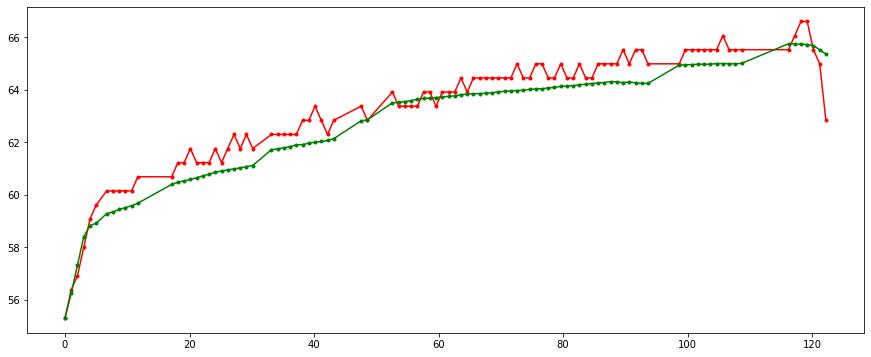

temp: [54.768 55.844 57.458 57.996 57.996 58.534 58.534 58.534]
t0  : [54.768 55.844 57.458 57.996 57.996 58.534 58.534 58.534]
t1  : [55.844 57.458 57.996 57.996 58.534 58.534 58.534 59.072]
dt  : [1.076 1.614 0.538 0.    0.538 0.    0.    0.538]
     temp   delta_t  PERF_COUNT_HW_CPU_CYCLES  PERF_COUNT_HW_INSTRUCTIONS  \
0  54.768  1.001651                 553726344                   437990042   

   PERF_COUNT_HW_CACHE_MISSES  PERF_COUNT_HW_BRANCH_MISSES  \
0                       86519                       328194   

   PERF_COUNT_HW_BRANCH_INSTRUCTIONS  PERF_COUNT_HW_CACHE_LL_read_miss  \
0                           54483811                             82385   

   PERF_COUNT_HW_CACHE_L1D_read_miss  
0                              86520  


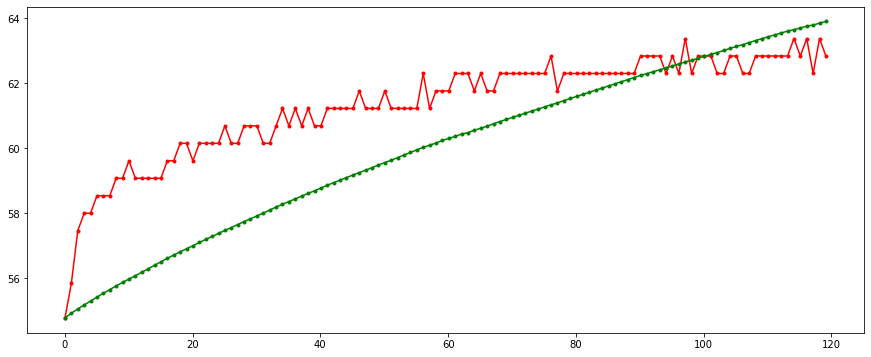

temp: [55.306 56.92  57.996 59.072 57.996 56.92  57.458 57.996]
t0  : [55.306 56.92  57.996 59.072 57.996 56.92  57.458 57.996]
t1  : [56.92  57.996 59.072 57.996 56.92  57.458 57.996 55.844]
dt  : [ 1.614  1.076  1.076 -1.076 -1.076  0.538  0.538 -2.152]
     temp  delta_t  PERF_COUNT_HW_CPU_CYCLES  PERF_COUNT_HW_INSTRUCTIONS  \
0  55.306  1.00209                 739875267                   702726111   

   PERF_COUNT_HW_CACHE_MISSES  PERF_COUNT_HW_BRANCH_MISSES  \
0                       14254                     25202351   

   PERF_COUNT_HW_BRANCH_INSTRUCTIONS  PERF_COUNT_HW_CACHE_LL_read_miss  \
0                           75559507                              9227   

   PERF_COUNT_HW_CACHE_L1D_read_miss  
0                              14256  


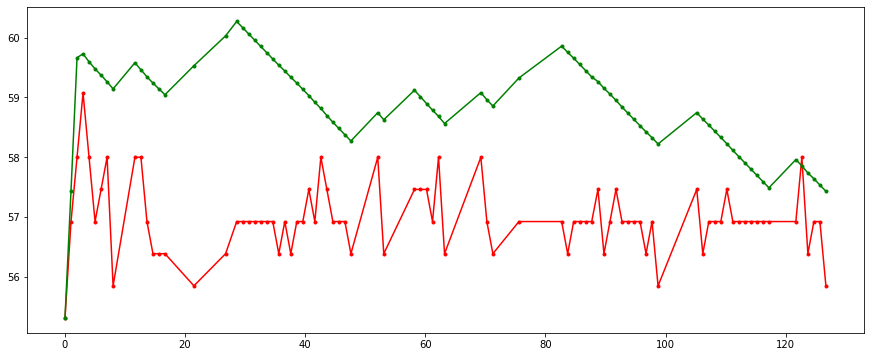

temp: [54.768 56.382 56.92  58.534 59.072 59.072 59.072 59.072]
t0  : [54.768 56.382 56.92  58.534 59.072 59.072 59.072 59.072]
t1  : [56.382 56.92  58.534 59.072 59.072 59.072 59.072 59.072]
dt  : [1.614 0.538 1.614 0.538 0.    0.    0.    0.   ]
     temp   delta_t  PERF_COUNT_HW_CPU_CYCLES  PERF_COUNT_HW_INSTRUCTIONS  \
0  54.768  1.001697                 626888329                   574087802   

   PERF_COUNT_HW_CACHE_MISSES  PERF_COUNT_HW_BRANCH_MISSES  \
0                       11061                     16150488   

   PERF_COUNT_HW_BRANCH_INSTRUCTIONS  PERF_COUNT_HW_CACHE_LL_read_miss  \
0                           63858374                              9108   

   PERF_COUNT_HW_CACHE_L1D_read_miss  
0                              11062  


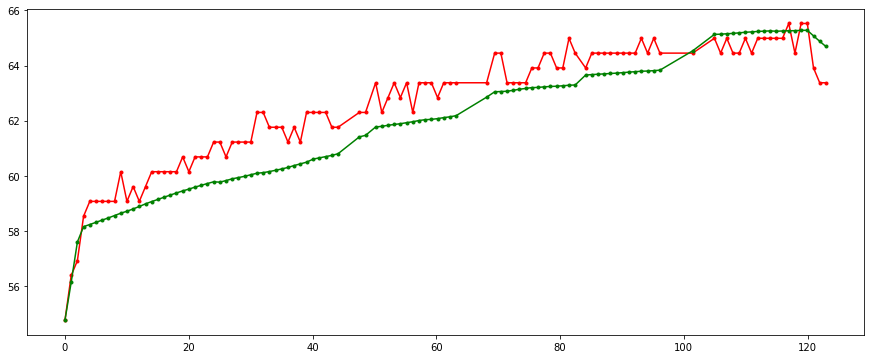

temp: [54.768 56.92  56.92  57.996 57.996 57.996 59.072 57.996]
t0  : [54.768 56.92  56.92  57.996 57.996 57.996 59.072 57.996]
t1  : [56.92  56.92  57.996 57.996 57.996 59.072 57.996 58.534]
dt  : [ 2.152  0.     1.076  0.     0.     1.076 -1.076  0.538]
     temp   delta_t  PERF_COUNT_HW_CPU_CYCLES  PERF_COUNT_HW_INSTRUCTIONS  \
0  54.768  1.010348                  35209013                     3105167   

   PERF_COUNT_HW_CACHE_MISSES  PERF_COUNT_HW_BRANCH_MISSES  \
0                      164249                       152897   

   PERF_COUNT_HW_BRANCH_INSTRUCTIONS  PERF_COUNT_HW_CACHE_LL_read_miss  \
0                             474013                            155602   

   PERF_COUNT_HW_CACHE_L1D_read_miss  
0                             164251  


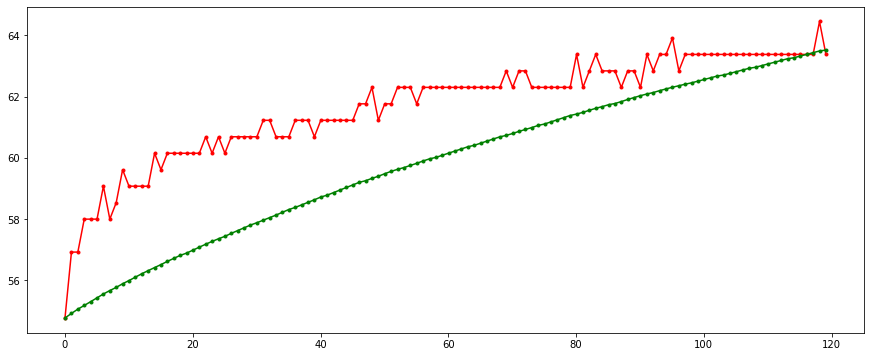

temp: [54.768 56.382 57.996 59.072 59.072 60.148 59.61  59.61 ]
t0  : [54.768 56.382 57.996 59.072 59.072 60.148 59.61  59.61 ]
t1  : [56.382 57.996 59.072 59.072 60.148 59.61  59.61  59.072]
dt  : [ 1.614  1.614  1.076  0.     1.076 -0.538  0.    -0.538]
     temp   delta_t  PERF_COUNT_HW_CPU_CYCLES  PERF_COUNT_HW_INSTRUCTIONS  \
0  54.768  1.001749                 888743763                   808388194   

   PERF_COUNT_HW_CACHE_MISSES  PERF_COUNT_HW_BRANCH_MISSES  \
0                       39919                     22550307   

   PERF_COUNT_HW_BRANCH_INSTRUCTIONS  PERF_COUNT_HW_CACHE_LL_read_miss  \
0                           89976390                             35916   

   PERF_COUNT_HW_CACHE_L1D_read_miss  
0                              39923  


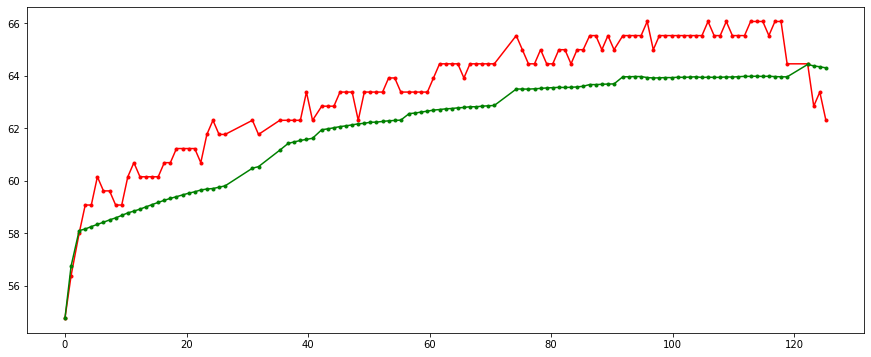

In [ ]:
for idx in range(30):
    fname = ds.test_files[idx]
    td = dataset._delta_temp_column(fname)
    td = dataset.load_dataframe(fname)
    #yt = td.d_temp.to_numpy()
    #Xt = td.drop('d_temp',axis=1)
    #Xts = sv.transform(Xt)
    #yt_hat = Lv.predict(Xts)
    print(td.head(1))
    truth, pred, time = ds.trace_manual(td, v_predict)
    r = range(len(yt_hat))
    plt.figure(figsize=(15,6))
    #plt.plot(r,np.cumsum(yt),'r')
    #plt.plot(r,np.cumsum(yt_hat),'g')
    plt.plot(time,truth,'r.-')
    plt.plot(time,pred[:-1],'g.-')
    plt.show()

In [ ]:
direction = (y_hat * y_test) >= 0
p_dir = sum(direction)
f_dir = len(direction) - p_dir

In [ ]:
error = (y_hat - y_test)/y_test.mean()
print(error)

In [ ]:

plt.figure(figsize=(10,8))
plt.plot(range(len(y_hat)),y_test, 'r.')
plt.plot(range(len(y_hat)),y_hat, 'g.')
plt.show()


In [ ]:
plt.bar([1,2],[p_dir,f_dir])

In [ ]:
y_hat

In [ ]:
training = sv.fit_transform(ds.training_data,)
plt.figure(figsize=(15,6))
plt.violinplot(dataset=training)

In [39]:
ptrain = pd.DataFrame(training,columns=ds.training_data.columns)
ds.training_data.describe()

,temp,delta_t,PERF_COUNT_HW_CPU_CYCLES,PERF_COUNT_HW_INSTRUCTIONS,PERF_COUNT_HW_CACHE_MISSES,PERF_COUNT_HW_BRANCH_MISSES,PERF_COUNT_HW_BRANCH_INSTRUCTIONS,PERF_COUNT_HW_CACHE_LL_read_miss,PERF_COUNT_HW_CACHE_L1D_read_miss,d_temp
count,11000.000000,11000.0,1.100000e+04,1.100000e+04,11000.000000,1.100000e+04,1.100000e+04,11000.000000,11000.000000,11000.000000
mean,62.370233,1.0,5.201280e+08,4.127837e+08,68499.128555,2.973423e+05,5.133806e+07,64960.353503,68499.849583,0.020894
std,2.482432,0.0,3.725612e+08,3.098984e+08,54798.399579,1.986622e+05,3.848833e+07,51811.044220,54798.829150,0.114128
min,48.850000,1.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-1.254142
25%,61.224000,1.0,2.466191e+08,1.934115e+08,1729.544941,1.658688e+05,2.410231e+07,1894.822653,1729.725206,0.000000
50%,62.300000,1.0,4.578092e+08,3.616913e+08,66959.401976,2.798430e+05,4.500033e+07,63639.900536,66959.662258,0.036395
75%,64.452000,1.0,7.989399e+08,6.442153e+08,107054.293776,3.959180e+05,8.007042e+07,101519.240511,107054.825086,0.058924
max,67.142000,1.0,1.187678e+09,9.675420e+08,251138.136783,9.070783e+06,1.202447e+08,242262.518339,251136.138445,1.253557
